In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### **Product Data Analysis**
1. Total number of orders by Month.
2. Monthly Revenue.  

## **Load Data**

In [2]:
df = pd.read_excel("Online Retail dataset.xlsx",sheet_name="Online Retail",parse_dates=["InvoiceDate"])

In [3]:
df.shape

(541909, 8)

## **Helping Functions**

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df["Quantity"].describe()


,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [8]:
df = df[df["Quantity"] > 0]

In [9]:
df["Quantity"].describe()

,Quantity
count,531285.000000
mean,10.655262
std,156.830323
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [10]:
df.set_index("InvoiceDate",inplace=True)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [76]:
monthly_orders_data = df["InvoiceNo"].resample("M").nunique()
monthly_orders_data

,InvoiceNo
InvoiceDate,
2010-12-31,1629
2011-01-31,1120
2011-02-28,1126
2011-03-31,1531
2011-04-30,1318
2011-05-31,1731
2011-06-30,1576
2011-07-31,1540
2011-08-31,1409


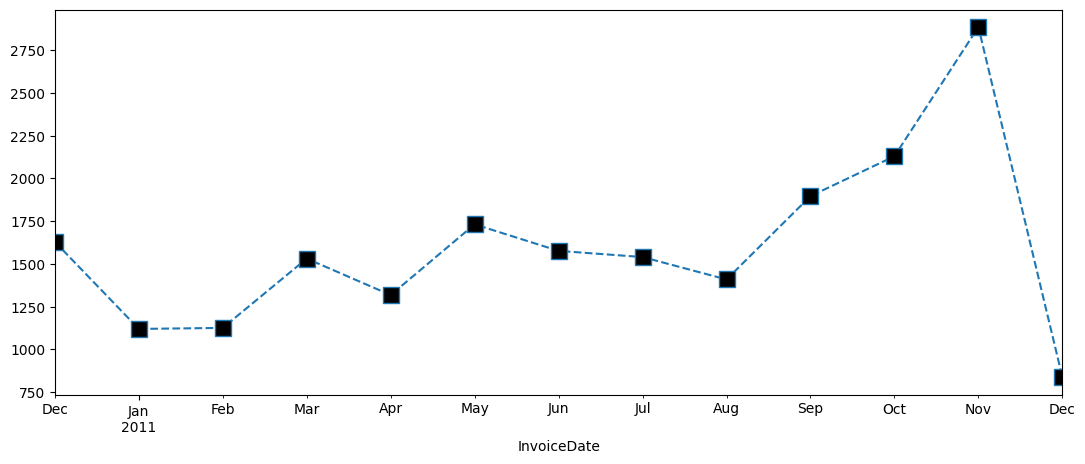

In [13]:
monthly_orders_data.plot(figsize=(13,5),marker="s",ms=12,mfc="black",ls="--")
plt.show()

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [15]:
newdf = df[df.index < "2011-12-01"]

In [16]:
newdf

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-11-30 17:37:00,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,1.25,15444.0,United Kingdom
2011-11-30 17:37:00,579885,21742,LARGE ROUND WICKER PLATTER,2,5.95,15444.0,United Kingdom
2011-11-30 17:37:00,579885,23084,RABBIT NIGHT LIGHT,6,2.08,15444.0,United Kingdom


Text(0.5, 1.0, 'Orders By Month')

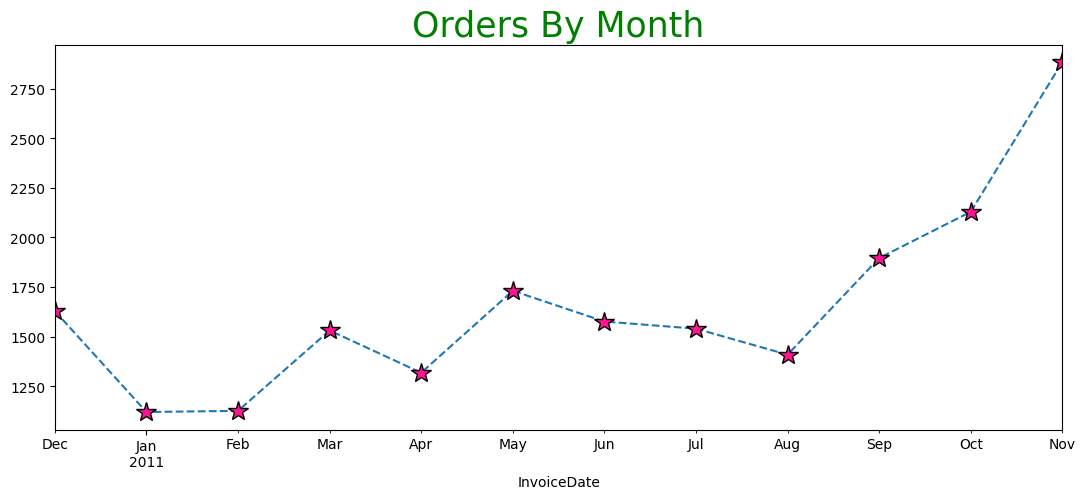

In [75]:
newdf['InvoiceNo'].resample("M").nunique().plot(ls="--",
                                                marker="*",
                                                ms=15,
                                                mfc="deeppink",
                                                mec="black",
                                                figsize=(13,5)
                                                )
plt.title("Orders By Month",color="green",size=25)

In [78]:
newdf

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-11-30 17:37:00,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,1.25,15444.0,United Kingdom,5.00
2011-11-30 17:37:00,579885,21742,LARGE ROUND WICKER PLATTER,2,5.95,15444.0,United Kingdom,11.90
2011-11-30 17:37:00,579885,23084,RABBIT NIGHT LIGHT,6,2.08,15444.0,United Kingdom,12.48


## **Monthly Revenue**

In [80]:
# Sales
newdf["Sales"] = newdf["Quantity"] * newdf["UnitPrice"]

<ipython-input-80-f5a9df35f070>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["Sales"] = newdf["Quantity"] * newdf["UnitPrice"]


In [83]:
monthly_revenue = newdf["Sales"].resample("M").sum()

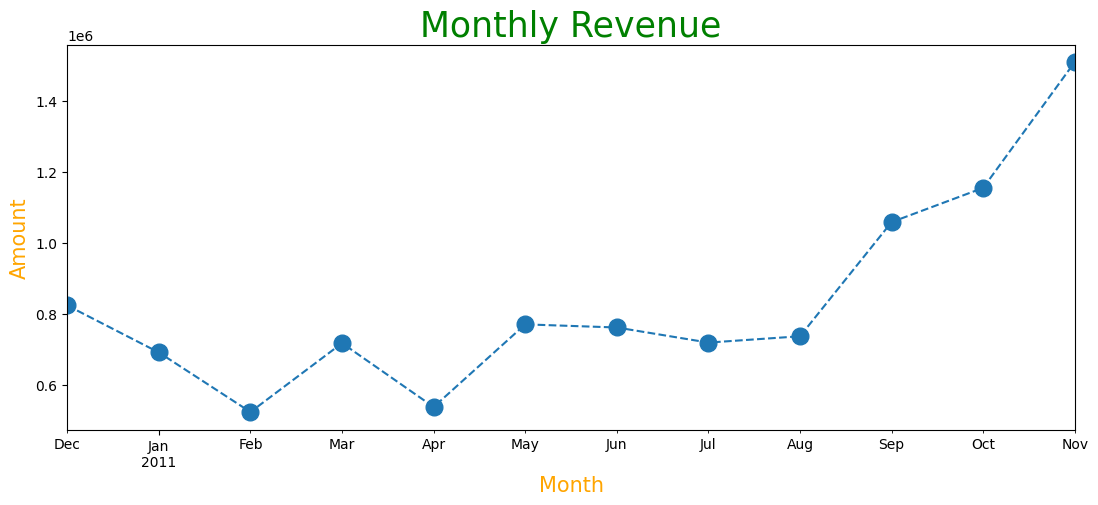

In [93]:
monthly_revenue.plot(figsize=(13,5),ls="--",marker="o",ms="12")
plt.title("Monthly Revenue",size=25,color="green")
plt.xlabel("Month",size=15,color="orange")
plt.ylabel("Amount",size=15,color="orange")
plt.show()


In [94]:
newdf

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-11-30 17:37:00,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,1.25,15444.0,United Kingdom,5.00
2011-11-30 17:37:00,579885,21742,LARGE ROUND WICKER PLATTER,2,5.95,15444.0,United Kingdom,11.90
2011-11-30 17:37:00,579885,23084,RABBIT NIGHT LIGHT,6,2.08,15444.0,United Kingdom,12.48


In [99]:
total_unique_customers_by_month = newdf["CustomerID"].resample("M").nunique()

In [104]:
newdf_with_date_coulum = newdf.reset_index()

In [105]:
newdf_with_date_coulum

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
506145,2011-11-30 17:37:00,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,1.25,15444.0,United Kingdom,5.00
506146,2011-11-30 17:37:00,579885,21742,LARGE ROUND WICKER PLATTER,2,5.95,15444.0,United Kingdom,11.90
506147,2011-11-30 17:37:00,579885,23084,RABBIT NIGHT LIGHT,6,2.08,15444.0,United Kingdom,12.48
506148,2011-11-30 17:37:00,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,7.95,15444.0,United Kingdom,7.95


In [107]:
newdf_with_date_coulum = newdf_with_date_coulum.groupby(["InvoiceNo","InvoiceDate"])["CustomerID"].first()

In [108]:
newdf_with_date_coulum = newdf_with_date_coulum.reset_index()

In [109]:
newdf_with_date_coulum

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
1,536366,2010-12-01 08:28:00,17850.0
2,536367,2010-12-01 08:34:00,13047.0
3,536368,2010-12-01 08:34:00,13047.0
4,536369,2010-12-01 08:35:00,13047.0
...,...,...,...
19926,579881,2011-11-30 17:22:00,12429.0
19927,579885,2011-11-30 17:37:00,15444.0
19928,A563185,2011-08-12 14:50:00,NaN
19929,A563186,2011-08-12 14:51:00,NaN


In [110]:
newdf_without_date_col = newdf_with_date_coulum.set_index("InvoiceDate")

In [111]:
newdf_without_date_col

,InvoiceNo,CustomerID
InvoiceDate,,
2010-12-01 08:26:00,536365,17850.0
2010-12-01 08:28:00,536366,17850.0
2010-12-01 08:34:00,536367,13047.0
2010-12-01 08:34:00,536368,13047.0
2010-12-01 08:35:00,536369,13047.0
...,...,...
2011-11-30 17:22:00,579881,12429.0
2011-11-30 17:37:00,579885,15444.0
2011-08-12 14:50:00,A563185,NaN


In [127]:
def count_repeat(grp):
  # values = list(grp.values)
  # repeat = 0
  # for val in set(values):
  #   c = values.count(val)
  #   if c > 1:
  #     repeat+=1
  data = grp.value_counts() > 1
  return data.sum()

In [128]:
monthly_repeat_customers = newdf_without_date_col["CustomerID"].resample("M").apply(count_repeat)

In [129]:
monthly_repeat_customers

,CustomerID
InvoiceDate,
2010-12-31,263
2011-01-31,153
2011-02-28,153
2011-03-31,203
2011-04-30,170
2011-05-31,281
2011-06-30,220
2011-07-31,227
2011-08-31,198
